# Importing Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Data Exploration & Preprocessing

In [61]:
# Training Dataset:
train_df = pd.read_csv("/content/'churn-bigml-80.csv'")
# Testing Dataset:
test_df = pd.read_csv("/content/'churn-bigml-20.csv'")

In [62]:
# A quick overview
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [63]:
# Checking any null values
train_df.isna().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [64]:
# Accesing the number of features and samples
train_df.shape

(2666, 20)

In [65]:
# A quick statistical overview, in fact we can get some notes from here:
train_df.describe()
# Number vmail messages is by far the strangest feature, as the mean and the 50% quantile is not approximately similar

# Also, Area code has an observed difference as well, but this should be okay as Area code is like zip code for example, just a number of codes
# but not a feature to assess statistically

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [66]:
# Viewing the non numeric features we couldn't see in the last command
train_df.info()
# State, Internatonal plan, Voice mail plan and churn of course
# Probably these featrues are going to be encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [67]:
# Checking the duplicates
train_df.duplicated().sum()
# Apparently, this dataset has been previousely cleaned well

0

In [68]:
# As we hypothesised, Area code is as shown only three codes
train_df['Area code'].unique()

array([415, 408, 510])

In [69]:
# This might be the most challenging feature, as we see here, it's just random -for now- and this result tells us why there are many outliers
train_df['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 41, 28, 30, 34, 46, 35, 21, 42, 36,
       22, 23, 43, 31, 38, 40, 29, 18, 32, 17, 45, 16, 14, 20, 19, 15, 12,
       47,  8, 44,  4, 10, 13, 50,  9])

In [70]:
# Different states here, we might remove it for the Area code or doing the opposite
train_df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

In [71]:
# Boolean options, I think encoding will be the best approach here
train_df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [72]:
# As the last feature
train_df['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

In [73]:
# Our target, I think it should be encoded as well
train_df['Churn'].unique()

array([False,  True])

In [74]:
# Encoding the non numeric features
le = LabelEncoder()

categorical_cols = ['State', 'International plan', 'Voice mail plan', 'Churn']

for col in categorical_cols:
    train_df[col] = le.fit_transform(train_df[col])

for col in categorical_cols:
    test_df[col] = le.transform(test_df[col])

In [75]:
train_df.describe()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,26.036009,100.620405,437.438860,0.101275,0.274944,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641,0.145536
std,14.921792,39.563974,42.521018,0.301750,0.446570,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236,0.352707
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,73.000000,408.000000,0.000000,0.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.000000,100.000000,415.000000,0.000000,0.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,0.000000,1.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,510.000000,1.000000,1.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


## Visualizing the correlation of features

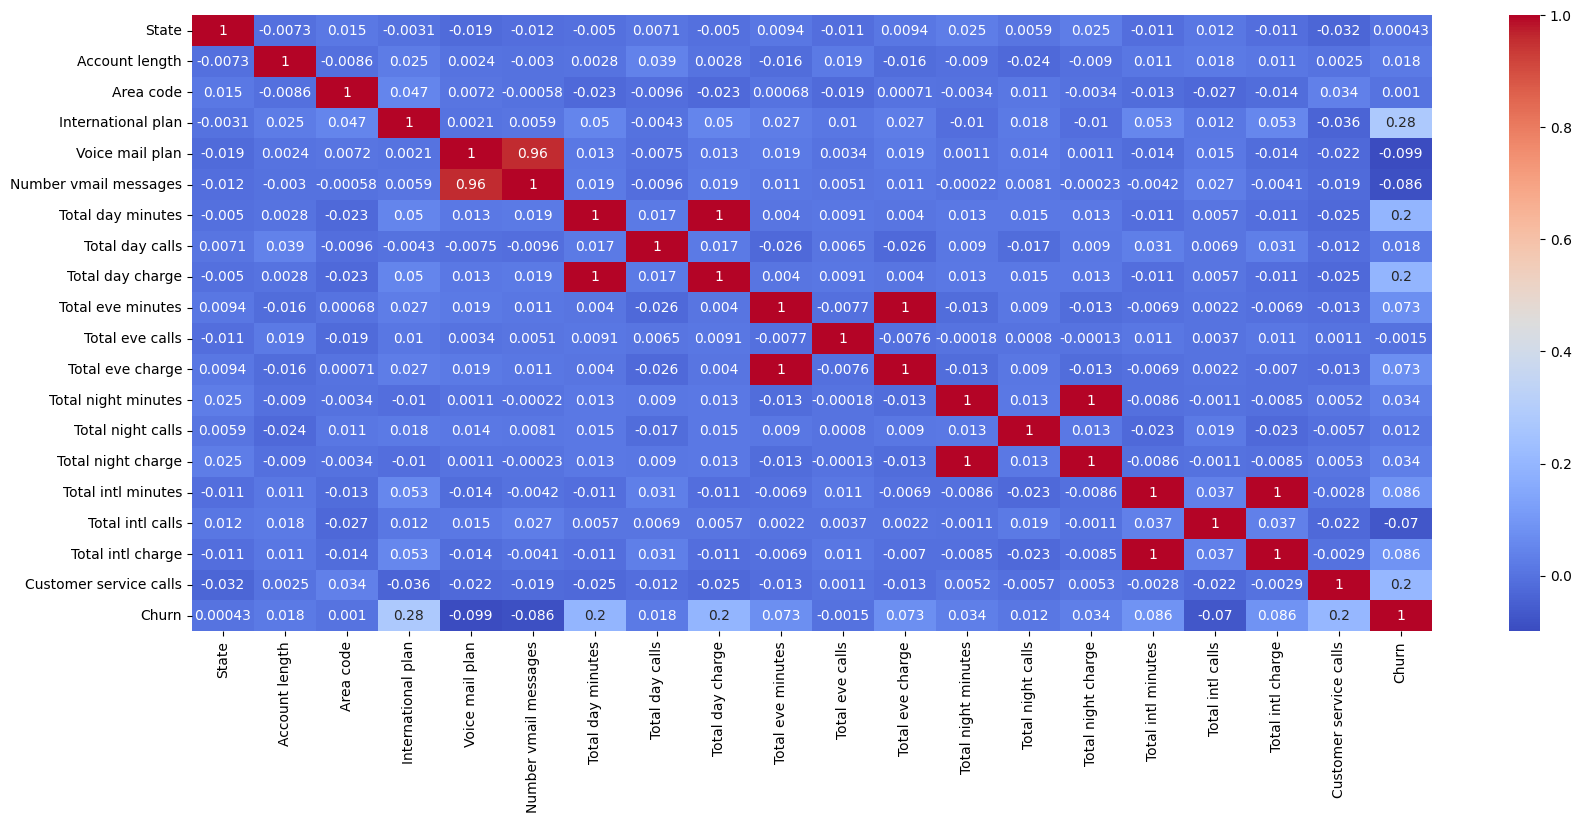

In [76]:
# In this step, we should know which features are most important to the dataset, and which isn't, and how can we use proper feature engineering
# for our purposes
corr_matrix = train_df.corr()
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, ax=ax, cmap="coolwarm")
plt.show()

### This will be for the notes extracted from the plot

In [77]:
# Most features correlate with our target ['Churn'] are: ['International plan'], ['Voice mail plan'], ['Total day minutes'], ['Total day charge'],
# ['Customer service calls]

# Least features correlate with our target ['Churn'] are: ['State'], ['Total eve calls']

# We can observe that there are some features that performs the same correlation with the target, we can simply some of them and remove some
# Like: (['Account length'], ['Total day calls']), (['Total day minutes'], ['Total day charge']), (['Total eve minutes'], ['Total eve charge]),
# (['Total night minutes'], ['Total night charge']), (['Total intl minutes'], ['Total intl charge'])
# We should first look for the correlation between these features before we can make such a thing

# First combination isn't strong enough so we can do what we want
# Second combination is straight 1, which means it must be engineered
# Third combination as well
# Fourth combination as well
# Fifth combination as well

# Also, the heat map shows that the correlation between ['Voice mail plan'] & ['Number vmail messages'] is strong {approx. = 1}, although having
# weak correlation with the target, it might be engineered better than this situation

In [78]:
# Strenghting the first combination
train_df['Account_Day_Calls'] = train_df['Account length'] * train_df['Total day calls']
test_df['Account_Day_Calls'] = test_df['Account length'] * test_df['Total day calls']

In [79]:
# Strenghting the last combination
train_df['Voice vmail messages'] = train_df['Voice mail plan'] * train_df['Number vmail messages']
test_df['Voice vmail messages'] = test_df['Voice mail plan'] * test_df['Number vmail messages']

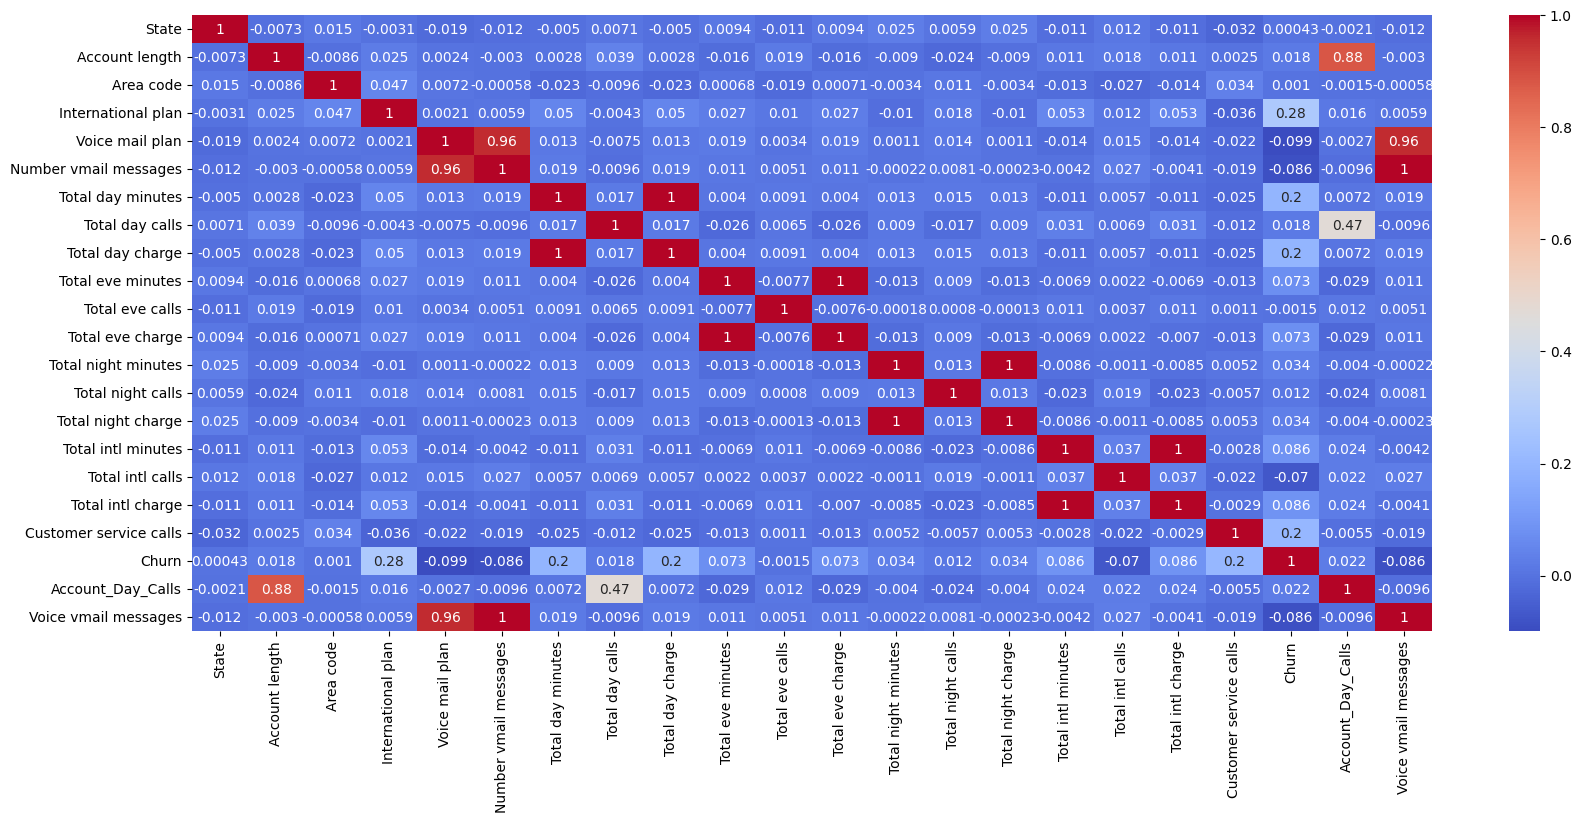

In [80]:
corr_matrix = train_df.corr()
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, ax=ax, cmap="coolwarm")
plt.show()
# First combination was a good try!
# Last combination was a bad try!

# Model Selection

In [81]:
# Dropping unwanted features
columns_to_drop = ['State', 'Total eve calls', 'Account length', 'Total day calls', 'Total day minutes', 'Total eve minutes', 'Total night minutes',
'Total intl minutes', 'Number vmail messages', 'Voice vmail messages', 'Churn']
# Assigning features and target
X_train = train_df.drop(columns_to_drop, axis = 1)
y_train = train_df['Churn']
X_test = test_df.drop(columns_to_drop, axis = 1)
y_test = test_df['Churn']

In [82]:
# Just for clarification
X_train.shape

(2666, 11)

### Comparison between the distribution of data: Normal VS Smote

<Axes: ylabel='count'>

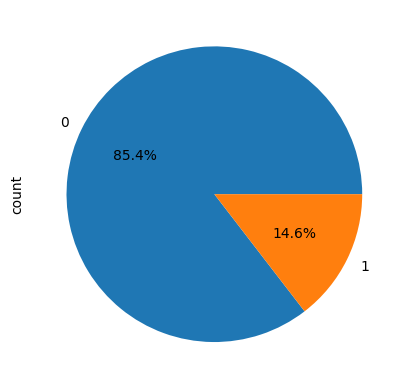

In [83]:
# Normal dataset
y_train.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [84]:
# Smotting the data for extra handling
smote = SMOTE(random_state = 45)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
data_smote = pd.concat([X_smote, y_smote], axis=1)

<Axes: ylabel='count'>

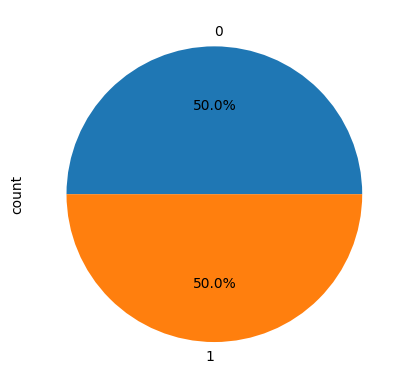

In [85]:
# Smotted dataset
y_smote.value_counts().plot(kind='pie', autopct='%1.1f%%')

# Training

## Perceptron

In [100]:
per = Perceptron(alpha=0.1, eta0=0.01, max_iter=1000)
per_scaled = Perceptron(alpha=0.1, eta0=0.01, max_iter=1000)

In [101]:
per.fit(X_train, y_train)

Perceptron(alpha=0.1, eta0=0.01)

In [102]:
y_pred_per = per.predict(X_test)

## Smotted Perceptron

In [109]:
per_smote = Perceptron(alpha=0.1, eta0=0.01, max_iter=1000)

In [110]:
per_smote.fit(X_smote, y_smote)

Perceptron(alpha=0.1, eta0=0.01)

In [111]:
y_pred_per_smote = per_smote.predict(X_test)

# Evaluation Metrics

In [103]:
accuracy = accuracy_score(y_pred_per, y_test)
print(f"Perceptron Accuracy Score: {accuracy}")
# Very bad result

Perceptron Accuracy Score: 0.1454272863568216


In [104]:
f1 = f1_score(y_pred_per, y_test, average = 'weighted')
print(f"Perceptron F1-Score: {f1}")
# Very bad result

Perceptron F1-Score: 0.24927127028820084


In [112]:
accuracy_smote = accuracy_score(y_pred_per_smote, y_test)
print(f"Smote Perceptron Accuracy Score: {accuracy_smote}")
# Much better result

Smote Perceptron Accuracy Score: 0.8575712143928036


In [113]:
f1_smote = f1_score(y_pred_per_smote, y_test, average = 'weighted')
print(f"Smote Perceptron F1-Score: {f1_smote}")
# Much better result

Smote Perceptron F1-Score: 0.9233252623083131


In [119]:
# For making it easier to read..
print(f"Perceptron Accuracy Score: {accuracy}")
print(f"Perceptron F1-Score: {f1}")
print(f"Smote Perceptron Accuracy Score: {accuracy_smote}")
print(f"Smote Perceptron F1-Score: {f1_smote}")

Perceptron Accuracy Score: 0.1454272863568216
Perceptron F1-Score: 0.24927127028820084
Smote Perceptron Accuracy Score: 0.8575712143928036
Smote Perceptron F1-Score: 0.9233252623083131
